中国联通 China Unicom

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): -0.019325849046530563
Avg Annual Return (Ari): 0.018753798925528076
Volatility (Std): 0.39023934735523025
Sharpe Ratio: -0.04952306623488295
Downside Volatility: 0.26346717912276
Sortino Ratio: -0.07335201716918929
VaR 99: -0.06403505611440338
VaR 99 (Year): -0.45667123513096586
CVaR 99: -0.08430246258984597
CVaR 99 (Year): -0.45667123513096586
Initial Value: 9.977128028869629
Peak Value: 12.692793846130371
Final Value: 6.260000228881836
Max Drawdown: 0.8174418279648179
Avg Drawdown: 0.502487851615188
Calmar Ratio: -0.023641864638424562
Sterling Ratio: -0.03846033090035888
Monthly Stats: 
      count      mean       std       min       25%       50%       75%  \
Date                                                                      
1      24.0  0.002377  0.117857 -0.276680 -0.093161  0.030965  0.077779   
2      24.0  0.001318  0.083799 -0.140909 -0.064917  0.002970  0.037425   
3      24.0 

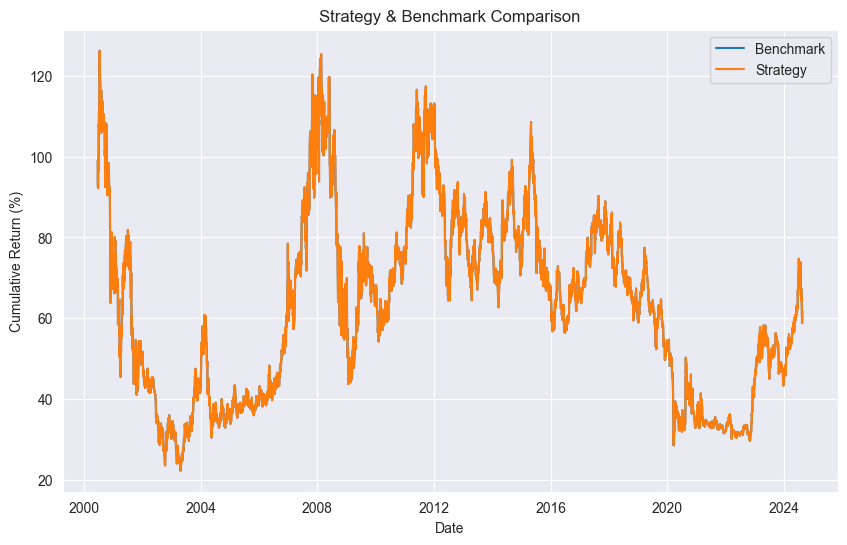

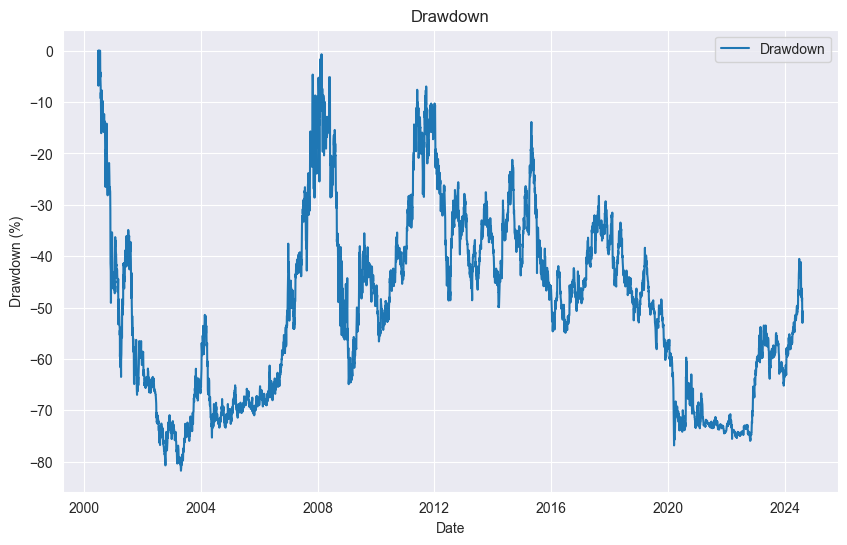

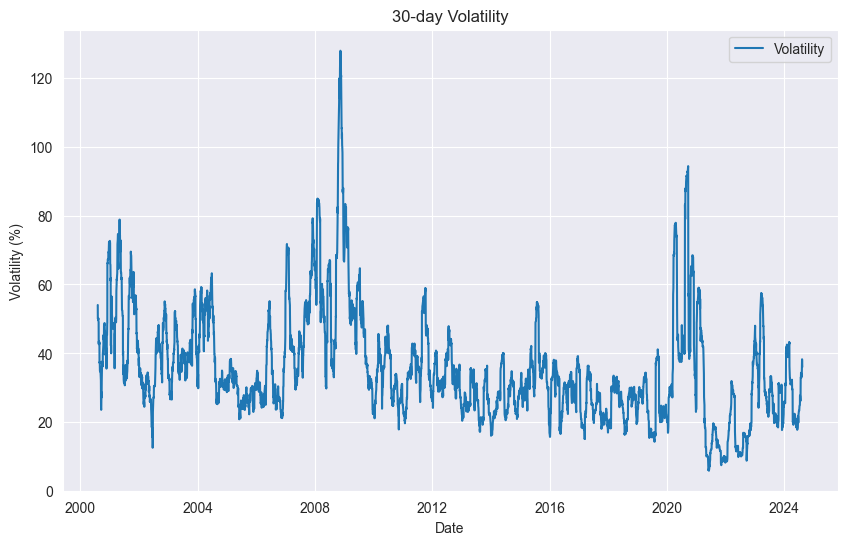

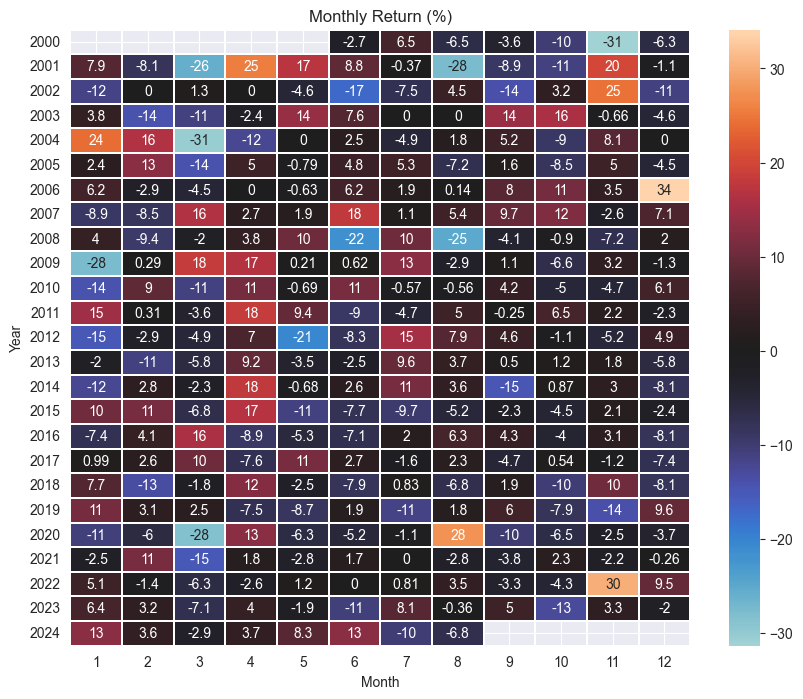

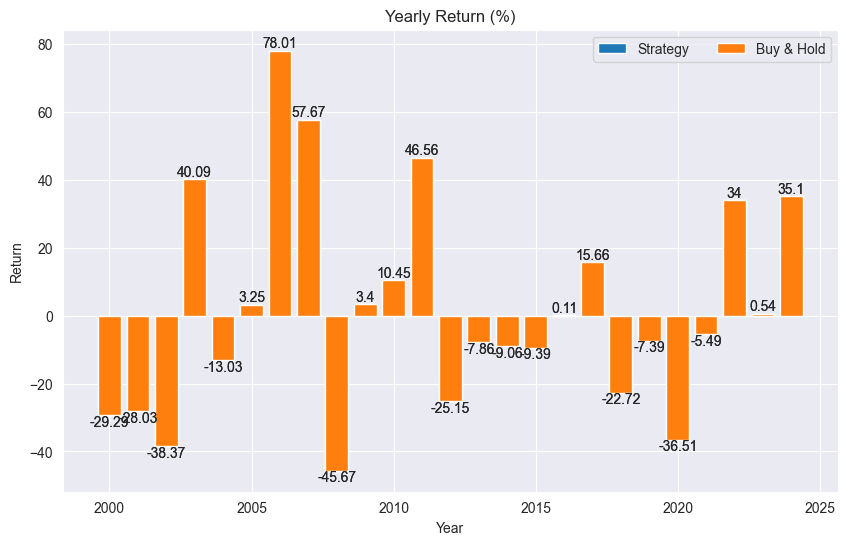

In [1]:
from datetime import datetime
from finance_utils.backtest import Backtest
from finance_utils.utils import *
import yfinance as yf
import pandas as pd

start_date = '2000-01-01'
df = yf.download('0762.HK', start=start_date)

df_new = pd.DataFrame()
df_new['Price'] = df['Adj Close']
df_new['Value'] = df['Adj Close']
df_new['Return'] = df['Adj Close'].pct_change()

test0762 = Backtest(df_new)

In [2]:
df_monthly = test0762.results['Monthly Return']
# set time here
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, start_date]

In [3]:
monthly_df = pd.DataFrame(test0762.results['Monthly Return'].copy())
monthly_stats = monthly_df.groupby(monthly_df.index.month).describe()['Monthly Return']
monthly_stats.index.name = 'Month'
monthly_stats = monthly_stats * 100
monthly_stats['count'] /= 100
monthly_stats['mean / std'] = monthly_stats['mean'] / monthly_stats['std']
monthly_stats

,count,mean,std,min,25%,50%,75%,max,mean / std
Month,,,,,,,,,
1,24.0,0.237651,11.785656,-27.667999,-9.316107,3.096450,7.777897,24.137948,0.020164
2,24.0,0.131789,8.379936,-14.090904,-6.491709,0.296981,3.742493,16.279060,0.015727
3,24.0,-4.983098,12.673476,-30.541870,-10.975246,-4.729385,-1.005953,18.285705,-0.393191
4,24.0,5.301118,9.754583,-12.230200,-0.588233,3.899590,12.480826,25.433535,0.543449
5,24.0,0.139492,8.390260,-20.613302,-3.767855,-0.684969,3.472750,17.050683,0.016625
6,25.0,-0.755945,9.269874,-21.645023,-7.715586,0.618511,4.799992,17.863433,-0.081549
7,25.0,1.339724,7.226682,-11.445093,-1.562509,0.806451,6.489655,15.206460,0.185386
8,25.0,-0.737823,10.434539,-27.777785,-5.214139,0.143881,3.703703,27.674412,-0.070710
9,24.0,-0.119555,7.167535,-14.580249,-3.879687,0.801673,4.701624,14.414427,-0.016680


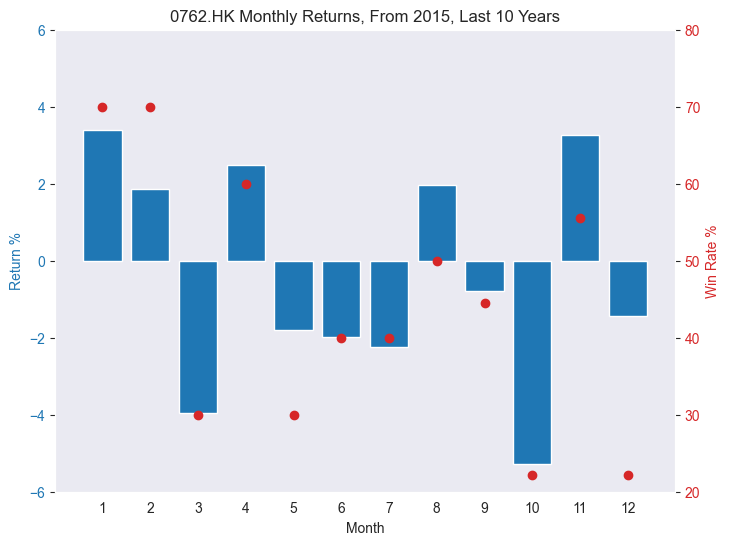

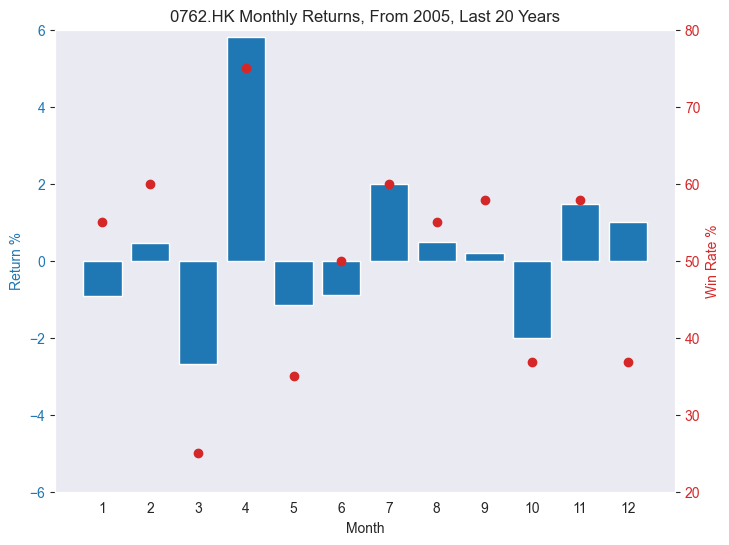

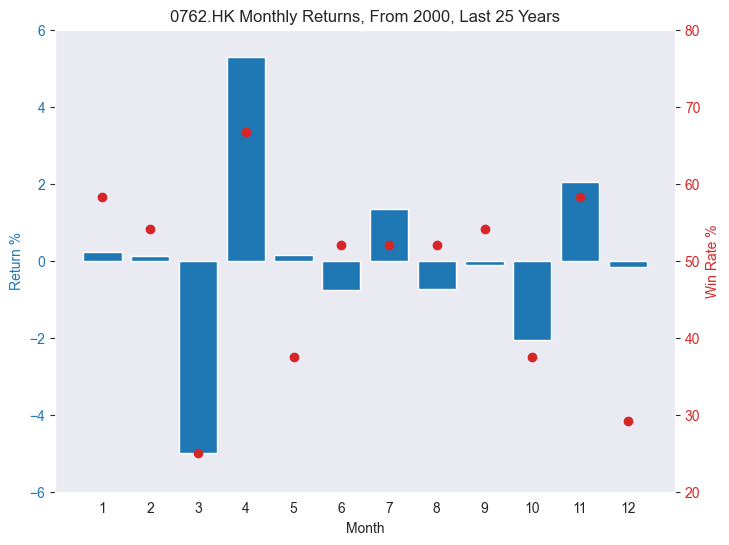

In [4]:
for time in choices:
    _new_df = df_monthly[df_monthly.index >= time]
    
    avg_returns = _new_df.groupby(_new_df.index.month).mean() * 100
    avg_returns.name = 'Return %'
    avg_returns.index.name = 'Month'
    
    wins = _new_df.groupby(_new_df.index.month).apply(lambda x: (x > 0).sum())
    alls = _new_df.groupby(_new_df.index.month).count()
    win_rates = wins / alls * 100
    win_rates.name = 'Win Rate %'
    win_rates.index.name = 'Month'
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    plt.grid(False)
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Return %', color=color)
    ax1.bar(x=avg_returns.index, height=avg_returns, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-6, 6)
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    plt.grid(False)
    color = 'tab:red'
    ax2.set_ylabel('Win Rate %', color=color)  # we already handled the x-label with ax1
    ax2.scatter(x=win_rates.index, y=win_rates, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(20, 80)
    
    plt.xticks(range(1, 13))
    years = 1 + _new_df.index.year[-1] - _new_df.index.year[0]
    plt.title(f'0762.HK Monthly Returns, From {_new_df.index[0].year}, Last {years} Years')
    plt.show()